# **Regression Modeling with PyCaret**

### 📝 **Introduction**
In this Lab we will **predict diamond prices** using **regression models**.

We will use **PyCaret**, an automated machine learning library, to:
- Load and preprocess data.
- Compare multiple machine learning models.
- Train, tune, and evaluate the best model.
- Predict diamond prices based on various features.

💡 **What is Regression?**
Regression is a type of machine learning used to predict **continuous values**.  
For example, predicting **house prices, stock values, or sales revenue**.

💡 **What is PyCaret?**
PyCaret is a **low-code machine learning library** that allows you to build ML models quickly with just a few lines of code.

🚀 **By the end of this lab, you will be able to:**
1. Load and preprocess data.
2. Compare different regression models automatically.
3. Train and tune a machine learning model.
4. Evaluate the model and make predictions.

Let's get started! 🎯


### **Install Required Libraries**

Before we begin, we need to install some essential Python libraries.

- `pycaret` → Automates the entire machine learning pipeline.
- `mlflow` → Used for model tracking and logging.
- `importlib-metadata` → Helps manage library dependencies.

🔽 **Run the following code to install them:**


In [ ]:
!pip install pycaret --upgrade
!pip install mlflow --upgrade
!pip install importlib-metadata==8.5.0


### Import PyCaret for Regression

Now, we will **import PyCaret's regression module**, which provides all the necessary functions for:

Data preprocessing  
Model training  
Model evaluation  
Hyperparameter tuning  
Model saving and deployment  

🔽 **Run the following code to import PyCaret:**

In [ ]:
from pycaret.regression import *

#### Load the Dataset from PyCaret

We will use **PyCaret's built-in dataset** called `"diamond"`.  
This dataset contains information about **diamond characteristics** and their **prices**.

**Why Use PyCaret’s Built-in Dataset?**
- PyCaret provides several datasets for **quick experiments**.
- No need to manually download or preprocess external datasets.
- It allows us to **focus on model building**.

🔽 **Run the following code to load the dataset:**

In [ ]:
# load the dataset from pycaret
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


####Splitting the Dataset for Training and Testing

After loading the dataset, we need to **split it into two parts**:

1 **Training Data (90%)** → Used to train and optimize the model.  
2 **Unseen Data (10%)** → Used to test how well the model predicts new values.

🔽 **Run the following code to split the dataset:**

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions (600, 8)


#### Initializing PyCaret for Regression

After loading and splitting the dataset, we need to **initialize PyCaret** to:
✅ Define the **target variable** (`Price`).  
✅ Apply **data preprocessing** (normalization, transformation, feature engineering).  
✅ Handle **multicollinearity** (remove highly correlated features).  
✅ Log the experiment for easy tracking.  

🔽 **Run the following code to set up PyCaret for regression:**
       



In [ ]:
# Initialize PyCaret setup for regression with the 'Price' column as the target
exp_reg102 = setup(data=data,
                   target='Price',
                   session_id=123,  # Random seed for reproducibility
                   normalize=True,  # Normalize the data
                   transformation=True,  # Apply transformations to the data
                   transform_target=True,  # Transform the target variable
                   rare_to_value=0.05,  # Assign rare category values
                   remove_multicollinearity=True,  # Remove multicollinearity
                   multicollinearity_threshold=0.95,  # Multicollinearity threshold
                   bin_numeric_features=['Carat Weight'],  # Bin 'Carat Weight' feature
                   log_experiment=True,  # Log the experiment in the workspace
                   experiment_name='diamond_price_prediction',  # Name for the experiment
                   verbose=False)  # Suppress detailed output

#####**Comparing Regression Models**

PyCaret allows us to **automatically test multiple regression models** and find the best-performing one.

**What Happens in This Step?**
- PyCaret trains **multiple regression models** on our dataset.
- It evaluates models using different **metrics** (R², RMSE, MAE, etc.).
- It selects the **best model** based on overall performance.
- We exclude the `'ransac'` model from the comparison.

🔽 **Run the following code to compare models:**


In [ ]:
best_model = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1669.9660,6375439.5238,2500.3723,0.9375,0.2240,0.1847,0.2790
gbr,Gradient Boosting Regressor,1737.6510,7032783.3658,2611.4470,0.9305,0.2254,0.1905,0.2620
rf,Random Forest Regressor,1782.9765,7562728.3995,2730.7880,0.9256,0.2424,0.1938,0.3480
et,Extra Trees Regressor,1934.6340,9478080.7982,3060.6766,0.9061,0.2623,0.2057,0.4310
dt,Decision Tree Regressor,1958.1817,10004086.6635,3150.1290,0.9005,0.2636,0.2068,0.1390
huber,Huber Regressor,2475.4675,14048592.6577,3724.9835,0.8618,0.2791,0.2457,0.1590
ridge,Ridge Regression,2539.5880,14482719.5883,3781.7478,0.8576,0.2764,0.2408,0.1910
br,Bayesian Ridge,2543.2311,14551919.1626,3790.5845,0.8569,0.2765,0.2408,0.1460
lr,Linear Regression,2549.7090,14747821.3379,3814.4370,0.8551,0.2769,0.2411,0.8310
ada,AdaBoost Regressor,2765.7058,25634838.3155,4995.6865,0.7525,0.2955,0.2298,0.2680


##### **Tuning the Best Model**
After selecting the best model, we will **fine-tune** it to improve performance.  
PyCaret automatically adjusts **hyperparameters** to optimize the model.

**What Happens in This Step?**
- PyCaret searches for the **best hyperparameters**.
- It evaluates multiple settings to **reduce error and improve accuracy**.
- We set `n_iter=10` to **limit the number of tuning iterations**.

🔽 **Run the following code to tune the best model:**

In [ ]:
tuned_best = tune_model(best_model, n_iter=10)  # Use a smaller number of iterations

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4319.5830,60120383.1118,7753.7335,0.3399,0.4351,0.3281
1,4904.6526,96919983.2673,9844.7947,0.2572,0.4826,0.3679
2,4664.4244,73992020.3137,8601.8614,0.3214,0.4710,0.3798
3,4496.2940,59351341.3712,7703.9822,0.3452,0.4493,0.3401
4,4056.3383,50226831.9594,7087.0891,0.3735,0.4423,0.3530
5,4664.9298,83124648.0235,9117.2720,0.2906,0.4674,0.3597
6,4809.1151,73729320.8209,8586.5779,0.3073,0.4726,0.3590
7,4244.7974,53585644.9779,7320.2216,0.3223,0.4467,0.3455
8,4635.2538,69548612.9951,8339.5811,0.3170,0.4584,0.3427


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### Individual model training

##### **Creating a LightGBM Model**  
Now, we will **create a LightGBM (Light Gradient Boosting Machine) model**.  
LightGBM is a **fast and efficient gradient boosting algorithm** widely used for regression tasks.

**What Happens in This Step?**  
- We create a **LightGBM model** using PyCaret.  
- LightGBM is designed to handle **large datasets efficiently**.  
- It is optimized for **speed, accuracy, and scalability**.  

🔽 **Run the following code to create the model:**  


In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1678.2105,5447110.8380,2333.9046,0.9402,0.2286,0.1862
1,1847.7449,10082280.4520,3175.2607,0.9227,0.2277,0.1906
2,1695.7549,5279329.7646,2297.6792,0.9516,0.2364,0.1990
3,1651.4778,4882819.6043,2209.7103,0.9461,0.2128,0.1760
4,1702.9998,6187406.3738,2487.4498,0.9228,0.2303,0.1932
5,1733.3395,7181096.3976,2679.7568,0.9387,0.2189,0.1857
6,1802.1759,7521631.1279,2742.5592,0.9293,0.2294,0.1851
7,1252.0478,3454274.0051,1858.5677,0.9563,0.1907,0.1472
8,1664.8319,8028096.9159,2833.3897,0.9212,0.2229,0.1812


##### **Tuning the LightGBM Model**  
Now that we have created the **LightGBM model**, we will fine-tune its **hyperparameters** for better performance.  
We define a **custom hyperparameter grid** to optimize the model.

**What Happens in This Step?**  
- We specify a **range of values** for key LightGBM hyperparameters.  
- PyCaret will **test different hyperparameter combinations** to find the best configuration.  
- This improves **model accuracy and reduces error**.  

🔽 **Run the following code to tune the LightGBM model:**  


In [ ]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

tuned_lightgbm = tune_model(lightgbm,
                            custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1747.1811,6489691.9362,2547.4874,0.9288,0.2351,0.1893
1,1890.9498,10012657.9404,3164.2784,0.9233,0.2387,0.1963
2,1800.4001,6727290.4299,2593.7021,0.9383,0.2445,0.2045
3,1718.9411,5526729.4912,2350.8997,0.9390,0.2198,0.1802
4,1770.0638,7082823.4482,2661.3574,0.9117,0.2387,0.1983
5,1768.6026,7165728.8317,2676.8879,0.9388,0.2274,0.1920
6,1918.8357,9478762.9376,3078.7600,0.9109,0.2389,0.1896
7,1305.5242,3883980.5777,1970.7817,0.9509,0.1963,0.1503
8,1818.5610,9427799.9653,3070.4723,0.9074,0.2324,0.1882


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


##### **Checking the Residuals of the Trained Model**  
Residuals help us **analyze the difference** between actual and predicted values.  
A good model should have **residuals randomly distributed around zero**.

**What Happens in This Step?**  
- We visualize the **residuals (errors) of the model**.  
- A **random distribution of residuals** indicates a well-fitted model.  
- Patterns in residuals suggest **model biases** or missing features.  

🔽 **Run the following code to check the residuals:**  

In [ ]:
# check the residuals of trained model
plot_model(tuned_best, plot = 'residuals_interactive')

    'data': [{'hovertemplate': 'Split=train<br>Predictions…

##### **Checking Feature Importance**  
Feature importance helps us understand **which variables have the most impact** on predictions.  
A model assigns higher importance to features that contribute more to **reducing prediction error**.

**What Happens in This Step?**  
- We visualize the **importance of each feature** in the model.  
- Higher values indicate **stronger influence** on predictions.  
- Less important features might be **removed** to simplify the model.

🔽 **Run the following code to check feature importance:**  

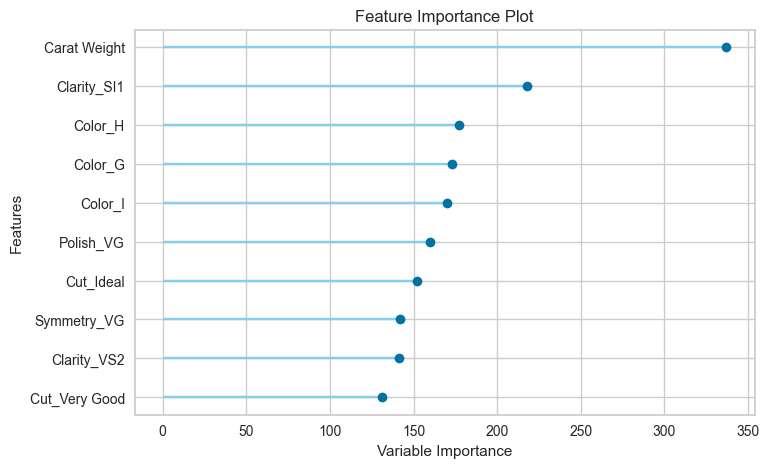

In [ ]:
# check feature importance
plot_model(tuned_best, plot = 'feature')

##### **Checking Prediction Error**  
The **prediction error plot** helps us understand how much the model's predictions deviate from actual values.  
A well-performing model should have **small and randomly distributed errors**.

**What Happens in This Step?**  
- The plot shows the **distribution of prediction errors**.  
- It helps identify **bias** (systematic over/under-prediction).  
- A **narrow error distribution** means better model performance.

🔽 **Run the following code to check prediction error:**  

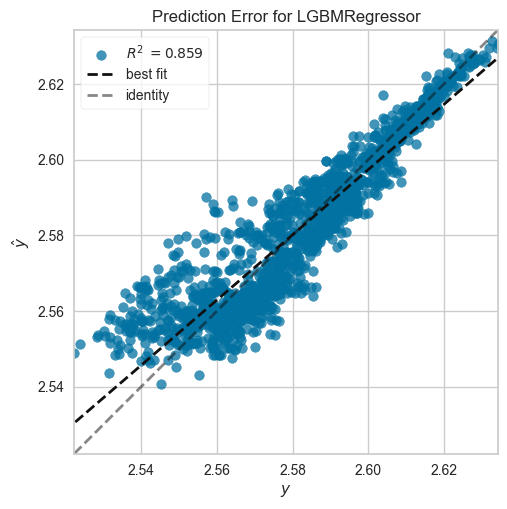

In [ ]:
plot_model(tuned_best, plot = 'error')

##### **Evaluating the Tuned Model**  
Model evaluation helps us analyze **how well the trained model performs** using different metrics.  
PyCaret provides an **interactive dashboard** to review model performance.

**What Happens in This Step?**  
- PyCaret generates **various evaluation metrics** (R², RMSE, MAE, etc.).  
- It provides **visualizations** to analyze model accuracy and errors.  
- This step helps in **identifying potential improvements**.

🔽 **Run the following code to evaluate the model:**  

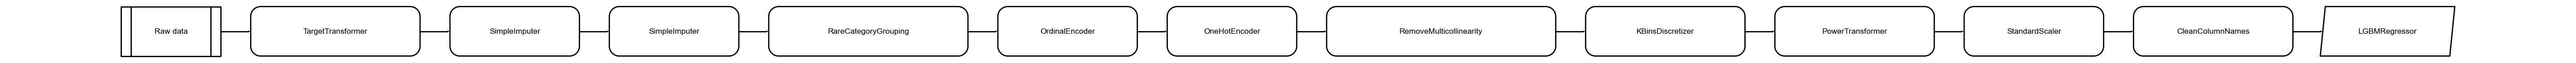

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(tuned_best)

#### Evaluate model with test data

Before finalizing the model, it is recommended to perform a final check by predicting the test set and reviewing the evaluation metrics. All of the evaluation metrics we've seen above are cross-validated results based **only on the training set (70%)**. Now, we are going to use the test data to see if the performance is different and there may be overfitting.

In [ ]:
predict_model(tuned_best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1663.0680,5695398.9005,2386.5035,0.9481,0.2233,0.1835


##### **Making Predictions on the Test Data**  
After training and evaluating the model, we use it to **make predictions** on new data.  
This step helps us see how well the model performs on **unseen data**.

**What Happens in This Step?**  
- The model predicts **diamond prices** for the test dataset.  
- PyCaret automatically adds a **prediction column** to the dataset.  
- We can compare **actual vs. predicted values**.

🔽 **Run the following code to make predictions:**  

In [ ]:
# finalize the model
final_best = finalize_model(tuned_best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrappe

##### **Making Predictions on Unseen Data**  
Now, we will use the **trained model** to predict diamond prices for **completely unseen data**.  
This step helps us evaluate how well the model generalizes to **new, real-world data**.

**What Happens in This Step?**  
- The model predicts **diamond prices** for the **unseen test dataset** (`data_unseen`).  
- PyCaret adds a **"Label" column** containing the predicted values.  
- We can compare **actual vs. predicted prices** for performance evaluation.

🔽 **Run the following code to make predictions on unseen data:**  


In [ ]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1707.3372,6413577.3322,2532.5042,0.9377,0.2202,0.1802


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,10512.192162
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10658.978702
2,1.01,Good,E,SI1,G,G,GIA,5161,4679.748196
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,33204.129546
4,1.01,Good,I,SI1,VG,VG,GIA,4238,3804.655310


##### **Evaluating Model Performance Using R² Score**  
Now, we will calculate the **R² Score (Coefficient of Determination)** to measure how well our model predicts unseen data.  
The **R² Score** indicates how much variance in the target variable is explained by the model.

**What Happens in This Step?**  
- We compare the **actual** and **predicted** values for unseen data.  
- A higher **R² Score (closer to 1.0)** means better predictions.  
- A lower score (closer to 0) means the model **does not explain the variance well**.

🔽 **Run the following code to calculate the R² Score:**  

In [ ]:
from sklearn.metrics import r2_score

# Using the correct column names for actual and predicted values
r2 = r2_score(unseen_predictions['Price'], unseen_predictions['prediction_label'])
print(f'R2 Score: {r2}')


R2 Score: 0.9376524035521808
